<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_AutomatedTrading_PUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Object-Oriented Programming in Python: State and Behavior](https://campus.datacamp.com/courses/object-oriented-programming-in-python)

# Define Class Functions

In [39]:
class PUR:
  def __init__(self, PUR_low, PUR_high,period):
    self.low = PUR_low
    self.high = PUR_high
    self.period = period
  def signals(self, URL):
    import pandas as pd 
    import numpy as np
    data=pd.read_csv(URL,index_col='Unnamed: 0')
    data.index=pd.to_datetime(data.index)
    signals = pd.DataFrame(index=data.index)
    signals['PriceUSD'] = data['PriceUSD']
    signals['PU Ratio'] = data['PU Ratio']
    signals['signal'] = signals['PU Ratio'].apply(lambda x: 1 if x<self.low else -1 if x>self.high else 0)
    signals=signals.dropna()
    return signals


  def positions(self, volume,signals):
      import pandas as pd 
      import numpy as np
      positions = pd.DataFrame(index=signals.index,columns=['Q']).fillna(0.0)
      duration =len(positions.index)
      for i in range(duration):
        index=i
        if index == 0:
          if signals['signal'][index]==1:
            positions['Q'][index]=volume
          else:
            positions['Q'][index]=0
        elif index>0:
          index_last = index-1
          index_buyin = index-self.period
          if positions['Q'][index_last]==volume:
            if ((positions['Q'][index_buyin:index]).sum()==volume*self.period) & (signals['signal'][index]==-1):  #sell only if there is a sell signal and investors have holden the volume for at least period=period
              positions['Q'][index]=0
            else:
              positions['Q'][index]=volume
          elif positions['Q'][index_last]==0:
            if signals['signal'][index]==1:
              positions['Q'][index]=volume
            else:
              positions['Q'][index]=0
      return positions

  def portfolio(self, initial_capital, positions):
      import pandas as pd 
      import numpy as np
      pos_diff= positions.diff()
      pos_diff.iloc[0]=positions.iloc[0]
      portfolio = pd.DataFrame(index=signals.index,columns=['holdings']).fillna(0.0)
      portfolio['holdings'] = positions['Q'].multiply(signals['PriceUSD'],axis=0)
      portfolio['cash'] = initial_capital - (pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
      portfolio['total'] = portfolio['cash'] + portfolio['holdings']
      return portfolio
  
  def signal_figure(self,signals, positions):
    import pandas as pd 
    import numpy as np
    pos_diff= positions.diff()
    pos_diff.iloc[0]=positions.iloc[0]
    pos_diff['PU Ratio']=signals['PU Ratio']
    import matplotlib.pyplot as plt
    fig, ax1 =plt.subplots()

        # Plot the buy signals
    ax1.plot(pos_diff.loc[pos_diff.Q == volume].index, pos_diff['PU Ratio'].loc[pos_diff.Q == volume], '^', markersize=20, color='green')
         # Plot the sell signals
    ax1.plot(pos_diff.loc[pos_diff.Q == -volume].index, pos_diff['PU Ratio'].loc[pos_diff.Q == -volume],'v', markersize=20, color='red')
    ax1=pos_diff['PU Ratio'].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
    return

  def portfolio_figure(self,portfolio):
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-bright')
    portfolio[['holdings', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
  def ROI(self, portfolio):
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

# Generate result by defining parameters

In [40]:
###show all columns
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### please provide the URL of the data

In [41]:
URL = 'https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv'

### please define the short and long window

In [42]:
PUR= PUR(PUR_low=61,PUR_high=119, period=0)

### print the signal table

In [43]:
signals= PUR.signals(URL)
signals.tail()

,PriceUSD,PU Ratio,signal
2020-12-27,26430.856597,94.450699,0
2020-12-28,27039.349020,99.165301,0
2020-12-29,27231.203455,100.231688,0
2020-12-30,28844.613678,113.942405,0
2020-12-31,29022.671413,115.804956,0


# print the position and portfolio table

In [44]:
volume=100
positions = PUR.positions(volume, signals)
positions.tail()

,Q
2020-12-27,100.0
2020-12-28,100.0
2020-12-29,100.0
2020-12-30,100.0
2020-12-31,100.0


In [45]:
initial_capital = 100000
portfolio = PUR.portfolio(initial_capital, positions)
portfolio.head()

,holdings,cash,total
2010-10-15,10.500000,99989.4895,99999.989500
2010-10-16,10.100000,99989.4895,99999.589500
2010-10-17,10.200000,99989.4895,99999.689500
2010-10-18,10.240000,99989.4895,99999.729500
2010-10-19,9.754489,99989.4895,99999.243989


In [46]:
portfolio.tail()

,holdings,cash,total
2020-12-27,2.643086e+06,807304.264279,3.450390e+06
2020-12-28,2.703935e+06,807304.264279,3.511239e+06
2020-12-29,2.723120e+06,807304.264279,3.530425e+06
2020-12-30,2.884461e+06,807304.264279,3.691766e+06
2020-12-31,2.902267e+06,807304.264279,3.709571e+06


### virtualize portfolio return 

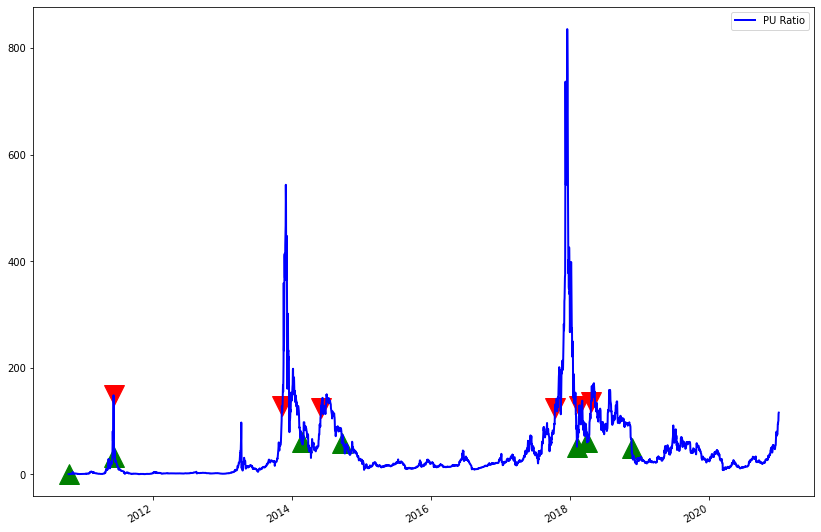

In [47]:
PUR.signal_figure(signals, positions)

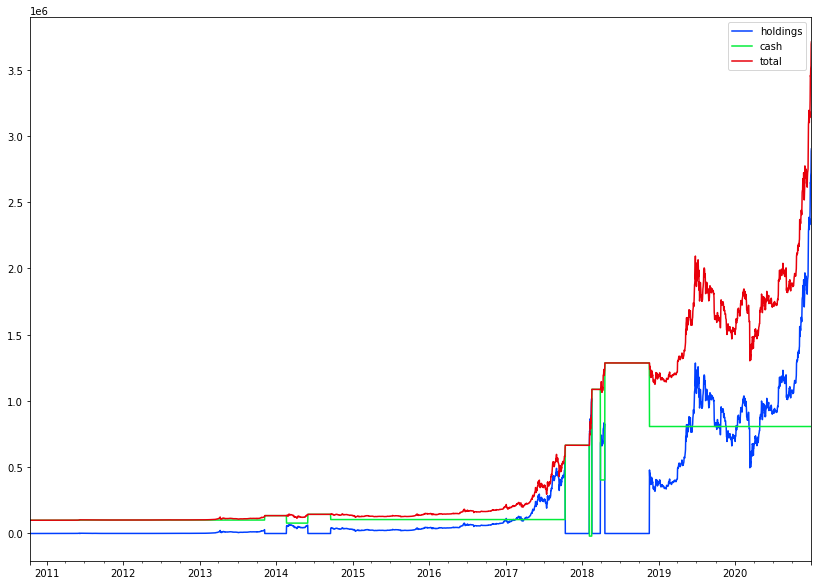

In [48]:
PUR.portfolio_figure(portfolio)

In [49]:
PUR.ROI(portfolio)

36.09571405541197

In [50]:
data=pd.read_csv(URL,index_col='Unnamed: 0')
data.index=pd.to_datetime(data.index)
data.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
Low_Set = np.arange(60,80,1)
High_Set = np.arange(100,120,1)

In [52]:
def ROI_PU(PUR_low, PUR_high):
    import pandas as pd 
    import numpy as np
    signals = pd.DataFrame(index=data.index)
    signals['PriceUSD'] = data['PriceUSD']
    signals['PU Ratio'] = data['PU Ratio']
    signals['signal'] = signals['PU Ratio'].apply(lambda x: 1 if x<PUR_low else -1 if x>PUR_high else 0)
    signals=signals.dropna()
    positions = pd.DataFrame(index=signals.index,columns=['Q']).fillna(0.0)
    duration =len(positions.index)
    for i in range(duration):
      index=i
      if index == 0:
       if signals['signal'][index]==1:
         positions['Q'][index]=volume
       else:
         positions['Q'][index]=0
      elif index>0:
        index_last = index-1
        if positions['Q'][index_last]==volume:
          if signals['signal'][index]==-1: 
            positions['Q'][index]=0
          else:
            positions['Q'][index]=volume
        elif positions['Q'][index_last]==0:
          if signals['signal'][index]==1:
            positions['Q'][index]=volume
          else:
              positions['Q'][index]=0
    pos_diff= positions.diff()
    pos_diff.iloc[0]=positions.iloc[0]
    portfolio = pd.DataFrame(index=signals.index,columns=['holdings']).fillna(0.0)
    portfolio['holdings'] = positions['Q'].multiply(signals['PriceUSD'],axis=0)
    portfolio['cash'] = initial_capital - (pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

In [53]:
Objectives =pd.DataFrame(columns=['PUR_low','PUR_high','ROI'])
for low in Low_Set:
  for high in High_Set:
    ROI =ROI_PU(low,high)
    Objectives=Objectives.append({'PUR_low': low, 'PUR_high': high, 'ROI':ROI}, ignore_index=True)
Objectives.head()

,PUR_low,PUR_high,ROI
0,60.0,100.0,31.016798
1,60.0,101.0,32.628594
2,60.0,102.0,32.672177
3,60.0,103.0,32.672177
4,60.0,104.0,32.672177


In [54]:
Objectives.iloc[Objectives['ROI'].idxmax()]

PUR_low      61.000000
PUR_high    119.000000
ROI          36.095714
Name: 39, dtype: float64